In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

from graph_tool.all import *
import numpy as np
import matplotlib.pyplot as plt

from scripts.generate_network import barabasi_albert
from scripts.hrg import *
from scripts.random_attacks import *
from scripts import visualization as viz

viz.load_matplotlib()
plt = viz.plt
plt.style.use('seaborn-poster')

In [2]:
ba_random_small_k_6 = pd.read_csv('../output/k=6/random_attack_edge_BA_N=8000_k=5.99975_ntimes=100.csv')
er_random_small_k_6 = pd.read_csv('../output/k=6/random_attack_edge_ER_N=8000_k=5.99975_ntimes=100.csv')
hrg1_random_small_k_6 = pd.read_csv('../output/k=6/random_attack_edge_HRG_1_N=8000_k=5.99975_ntimes=100.csv')
hrg2_random_small_k_6 = pd.read_csv('../output/k=6/random_attack_edge_HRG_2_N=8000_k=5.99975_ntimes=100.csv')
hrg3_random_small_k_6 = pd.read_csv('../output/k=6/random_attack_edge_HRG_1_stable_N=8000_k=6_ntimes=100.csv')


ba_random_large_k_6 = pd.read_csv('../output/k=6/random_attack_edge_BA_N=80000_k=5.999974999999999_ntimes=100.csv')
er_random_large_k_6 = pd.read_csv('../output/k=6/random_attack_edge_ER_N=80000_k=5.999974999999999_ntimes=100.csv')
hrg1_random_large_k_6 = pd.read_csv('../output/k=6/random_attack_edge_HRG_1_N=80000_k=5.999974999999999_ntimes=100.csv')
hrg2_random_large_k_6 = pd.read_csv('../output/k=6/random_attack_edge_HRG_2_N=80000_k=5.999974999999999_ntimes=100.csv')


ba_random_small_k_2 = pd.read_csv('../output/k=2/random_attack_edge_BA_N=8000_k=2.019_ntimes=100.csv')
er_random_small_k_2 = pd.read_csv('../output/k=2/random_attack_edge_ER_N=8000_k=2.019_ntimes=100.csv')
hrg_random_small_k_2 = pd.read_csv('../output/k=2/random_attack_edge_HRG_1_N=8000_k=2.019_ntimes=100.csv')
hrg3_random_small_k_2 = pd.read_csv('../output/k=2/random_attack_edge_HRG_1_stable_N=8000_k=2_ntimes=100.csv')

### Random attacks

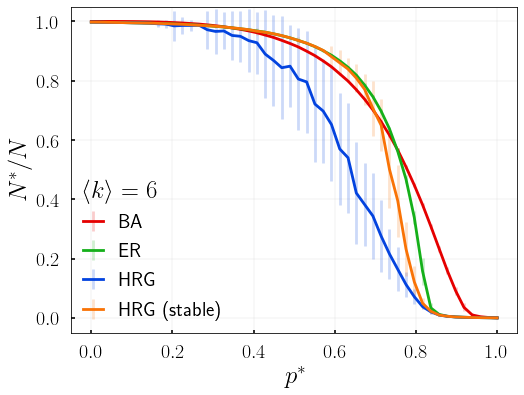

In [3]:
labels = ['BA', 'ER', 'HRG', 'HRG (stable)']
data = [ba_random_small_k_6, er_random_small_k_6, 
        hrg1_random_small_k_6, hrg3_random_small_k_6]

viz.plot_giant_connected_component_vs_removed(data, labels, fontsize=20, loc='lower left',
                                              title=r'$\left<k\right> = 6$', 
                                              title_fontsize=25)
# plt.text(0.93, 0.93, '(a)', fontsize=35)

# plt.title(r'Random attacks, $N=8000, k\approx 6$')
# plt.show()
# viz.save_figure('../plots/random_attack_small_k_6.pdf')
# viz.save_figure('../plots/random_attack_small_k_6.png')

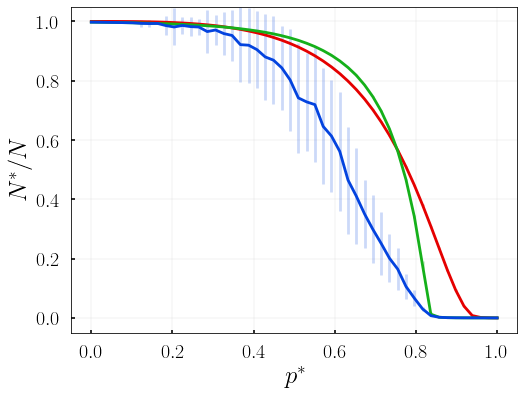

In [4]:
labels = ['BA', 'ER', 'HRG 1', 'HRG 2']
data = [ba_random_large_k_6, er_random_large_k_6, 
        hrg1_random_large_k_6] #hrg2_random_large_k_6]

viz.plot_giant_connected_component_vs_removed(data, labels, legend=False)
# plt.text(0.93, 0.93, '(b)', fontsize=35)
# plt.title(r'Random attacks, $N=80000, k\approx 6$')
# plt.show()
# viz.save_figure('../plots/random_attack_large_k_6.pdf')
# viz.save_figure('../plots/random_attack_large_k_6.png')

Text(0.85, 0.9, '(d)')

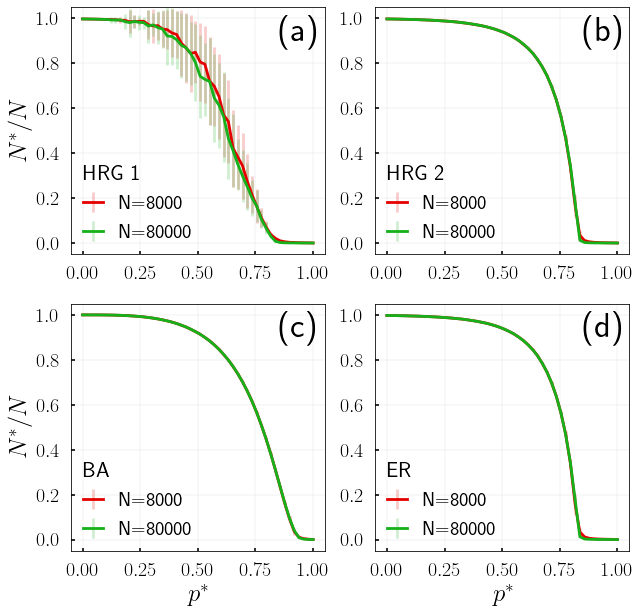

In [5]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)

labels = ['N=8000', 'N=80000']
data = [hrg1_random_small_k_6, hrg1_random_large_k_6]
viz.plot_giant_connected_component_vs_removed(data, labels, loc='lower left', new_fig=False, xlabel=False,
                                              fontsize=20, title='HRG 1', title_fontsize=22)
plt.text(0.85, 0.9, '(a)', fontsize=35)

plt.subplot(2, 2, 2)
data = [hrg2_random_small_k_6, hrg2_random_large_k_6]
viz.plot_giant_connected_component_vs_removed(data, labels, ylabel=False, new_fig=False, xlabel=False,
                                              fontsize=20, title='HRG 2', title_fontsize=22)
plt.text(0.85, 0.9, '(b)', fontsize=35)

plt.subplot(2, 2, 3)
data = [ba_random_small_k_6, ba_random_large_k_6]
viz.plot_giant_connected_component_vs_removed(data, labels, new_fig=False,
                                              fontsize=20, title='BA', title_fontsize=22)
plt.text(0.85, 0.9, '(c)', fontsize=35)

plt.subplot(2, 2, 4)
data = [er_random_small_k_6, er_random_large_k_6]
viz.plot_giant_connected_component_vs_removed(data, labels, ylabel=False, new_fig=False,
                                              fontsize=20, title='ER', title_fontsize=22)
plt.text(0.85, 0.9, '(d)', fontsize=35)
# plt.suptitle(r'Random attacks, $k\approx 6$', fontsize=20)
# plt.show()
# viz.save_figure('../plots/random_attack_comparison_k_6.pdf')

(0.0, 0.8)

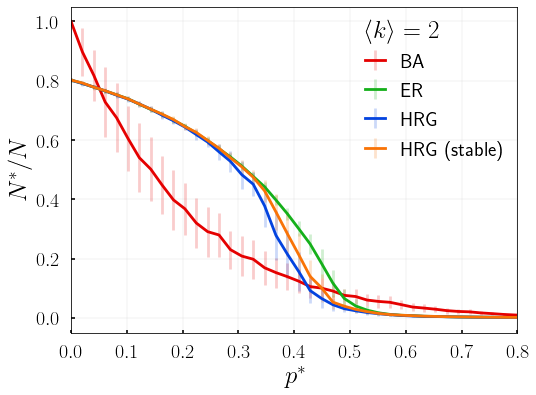

In [6]:
labels = ['BA', 'ER', 'HRG', 'HRG (stable)']
data = [ba_random_small_k_2, er_random_small_k_2, hrg_random_small_k_2, hrg3_random_small_k_2]

viz.plot_giant_connected_component_vs_removed(data, labels, fontsize=20, loc='upper right',
                                              title=r'$\left<k\right> = 2$', title_fontsize=25)
plt.xlim(0, 0.8)
# plt.text(0.93, 0.93, '(b)', fontsize=35)

# plt.title(r'Random attacks, $N=8000, k\approx 2$')
# plt.show()
# viz.save_figure('../plots/random_attack_small_k_2.pdf')
# viz.save_figure('../plots/random_attack_small_k_2.png')

### Intentional attacks 

In [10]:
# TODO: finish simulations on Spell
ba_intentional_small_k_6 = pd.read_csv('../output/k=6/intentional_attack_node_BA_N=8000_k=6_ntimes=100.csv')
er_intentional_small_k_6 = pd.read_csv('../output/k=6/intentional_attack_node_ER_N=8000_k=6_ntimes=100.csv')
hrg1_intentional_small_k_6 = pd.read_csv('../output/k=6/intentional_attack_node_HRG_1_N=8000_k=6_ntimes=100.csv')
hrg1_stable_intentional_small_k_6 = pd.read_csv('../output/k=6/intentional_attack_node_HRG_1_stable_N=8000_k=6_ntimes=100.csv')

# hrg2_intentional_small_k_6 = pd.read_csv('../output/k=6/intentional_attack_edge_HRG_2_N=8000_k=6_ntimes=100.csv')

ba_intentional_large_k_6 = pd.read_csv('../output/k=6/intentional_attack_edge_BA_N=80000_k=5.999974999999999_ntimes=100.csv')
er_intentional_large_k_6 = pd.read_csv('../output/k=6/intentional_attack_edge_ER_N=80000_k=5.999974999999999_ntimes=100.csv')
hrg1_intentional_large_k_6 = pd.read_csv('../output/k=6/intentional_attack_edge_HRG_1_N=80000_k=5.999974999999999_ntimes=100.csv')
hrg2_intentional_large_k_6 = pd.read_csv('../output/k=6/intentional_attack_edge_HRG_2_N=80000_k=5.999974999999999_ntimes=100.csv')

ba_intentional_small_k_2 = pd.read_csv('../output/k=2/intentional_attack_node_BA_N=8000_k=2_ntimes=100.csv')
er_intentional_small_k_2 = pd.read_csv('../output/k=2/intentional_attack_node_ER_N=8000_k=2_ntimes=100.csv')
hrg_intentional_small_k_2 = pd.read_csv('../output/k=2/intentional_attack_node_HRG_1_N=8000_k=2_ntimes=100.csv')
hrg_stable_intentional_small_k_2 = pd.read_csv('../output/k=2/intentional_attack_node_HRG_1_stable_N=8000_k=2_ntimes=100.csv')

<Figure size 576x432 with 0 Axes>

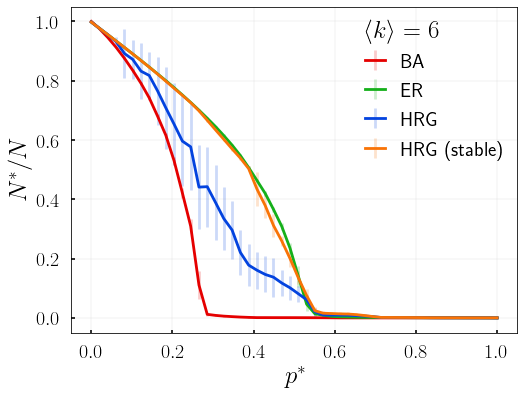

In [13]:
labels = ['BA', 'ER', 'HRG', 'HRG (stable)']
data = [ba_intentional_small_k_6, er_intentional_small_k_6, 
        hrg1_intentional_small_k_6, hrg1_stable_intentional_small_k_6]#, hrg2_intentional_small_k_6]

plt.figure(figsize=(8, 6))
viz.plot_giant_connected_component_vs_removed(data, labels, fontsize=20, loc='upper right',
                                              title=r'$\left<k\right> = 6$', title_fontsize=25)
# plt.text(0.93, 0.93, '(a)', fontsize=35)

# plt.title(r'Intentional attacks, $N=8000, k\approx 6$')
# plt.show()
# viz.save_figure("../plots/intentional_attacks_small_k_6.pdf")
# viz.save_figure("../plots/intentional_attacks_small_k_6.png")

<Figure size 576x432 with 0 Axes>

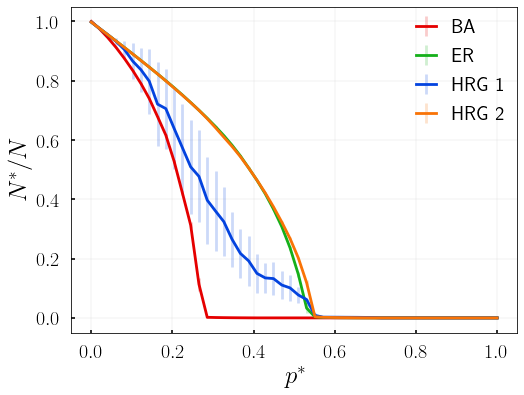

In [14]:
labels = ['BA', 'ER', 'HRG 1', 'HRG 2']
data = [ba_intentional_large_k_6, er_intentional_large_k_6,
        hrg1_intentional_large_k_6, hrg2_intentional_large_k_6]

plt.figure(figsize=(8, 6))
viz.plot_giant_connected_component_vs_removed(data, labels, fontsize=20)
# plt.title(r'Intentional attacks, $N=80000, k\approx 6$')
# plt.show()
# viz.save_figure("../plots/intentional_attacks_large_k_6.pdf")

NameError: name 'hrg2_intentional_small_k_6' is not defined

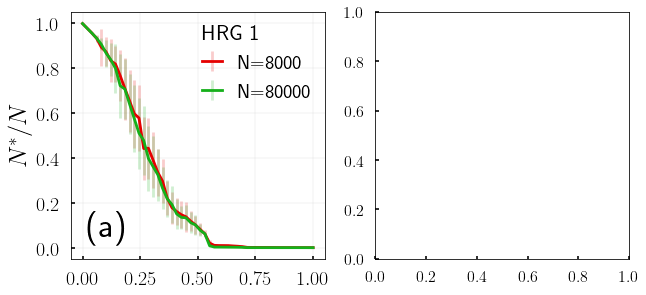

In [15]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
labels = ['N=8000', 'N=80000']
data = [hrg1_intentional_small_k_6, hrg1_intentional_large_k_6]
viz.plot_giant_connected_component_vs_removed(data, labels, new_fig=False, xlabel=False,
                                              fontsize=20, title='HRG 1', title_fontsize=22)
plt.text(0.02, 0.05, '(a)', fontsize=35)

plt.subplot(2, 2, 2)
data = [hrg2_intentional_small_k_6, hrg2_intentional_large_k_6]
viz.plot_giant_connected_component_vs_removed(data, labels, ylabel=False, new_fig=False, xlabel=False,
                                              fontsize=20, title='HRG 2', title_fontsize=22)
plt.text(0.02, 0.05, '(b)', fontsize=35)

plt.subplot(2, 2, 3)
data = [ba_intentional_small_k_6, ba_intentional_large_k_6]
viz.plot_giant_connected_component_vs_removed(data, labels, new_fig=False,
                                              fontsize=20, title='BA', title_fontsize=22)
plt.text(0.02, 0.05, '(c)', fontsize=35)

plt.subplot(2, 2, 4)
data = [er_intentional_small_k_6, er_intentional_large_k_6]
viz.plot_giant_connected_component_vs_removed(data, labels, ylabel=False, new_fig=False,
                                              fontsize=20, title='ER', title_fontsize=22)
plt.text(0.02, 0.05, '(d)', fontsize=35)

# plt.suptitle(r'Intentional attacks, $k\approx 6$', fontsize=20)
# plt.show()
# viz.save_figure("../plots/intentional_attacks_comparison_k_6.pdf")

(0.0, 0.2)

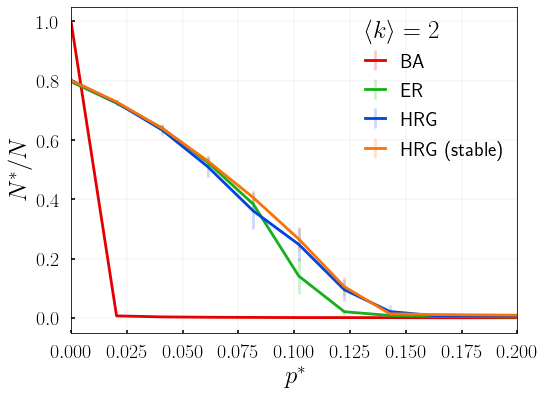

In [17]:
labels = ['BA', 'ER', 'HRG', 'HRG (stable)']
data = [ba_intentional_small_k_2, er_intentional_small_k_2, hrg_intentional_small_k_2,
        hrg_stable_intentional_small_k_2]

viz.plot_giant_connected_component_vs_removed(data, labels, fontsize=20,
                                              title=r'$\left<k\right> = 2$', title_fontsize=25)
plt.xlim(0, 0.2)
# plt.text(0.0045, 0.93, '(b)', fontsize=35)
# plt.show()
# viz.save_figure("../plots/intentional_attacks_small_k_2.pdf")
# viz.save_figure("../plots/intentional_attacks_small_k_2.png")